# Drinks Project

## Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import the Dataset

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv')

## Assign it to a variable called Drinks

In [3]:
drinks = df
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


## Number of rows and columns in the dataset

In [4]:
drinks.shape

(193, 6)

## Summarize all columns

In [22]:
drinks.describe(include = 'all')

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
count,193,193.000000,193.000000,193.000000,193.000000,170
unique,193,NaN,NaN,NaN,NaN,5
top,Afghanistan,NaN,NaN,NaN,NaN,AF
freq,1,NaN,NaN,NaN,NaN,53
mean,NaN,106.160622,80.994819,49.450777,4.717098,NaN
std,NaN,101.143103,88.284312,79.697598,3.773298,NaN
min,NaN,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,20.000000,4.000000,1.000000,1.300000,NaN
50%,NaN,76.000000,56.000000,8.000000,4.200000,NaN
75%,NaN,188.000000,128.000000,59.000000,7.200000,NaN


## Different Countries in the dataset

In [5]:
print(drinks['country'].nunique())
print(drinks['country'].unique())

193
['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola' 'Antigua & Barbuda'
 'Argentina' 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas'
 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin'
 'Bhutan' 'Bolivia' 'Bosnia-Herzegovina' 'Botswana' 'Brazil' 'Brunei'
 'Bulgaria' 'Burkina Faso' 'Burundi' "Cote d'Ivoire" 'Cabo Verde'
 'Cambodia' 'Cameroon' 'Canada' 'Central African Republic' 'Chad' 'Chile'
 'China' 'Colombia' 'Comoros' 'Congo' 'Cook Islands' 'Costa Rica'
 'Croatia' 'Cuba' 'Cyprus' 'Czech Republic' 'North Korea' 'DR Congo'
 'Denmark' 'Djibouti' 'Dominica' 'Dominican Republic' 'Ecuador' 'Egypt'
 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Ethiopia' 'Fiji'
 'Finland' 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece'
 'Grenada' 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti'
 'Honduras' 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq'
 'Ireland' 'Israel' 'Italy' 'Jamaica' 'Japan' 'Jordan' 'Kazakhstan'
 'Kenya' 'Kiribati'

## Different Continents in the dataset

In [6]:
print(drinks['continent'].nunique())
print(drinks['continent'].unique())

5
['AS' 'EU' 'AF' nan 'SA' 'OC']


## Print out the number of countries having beer servings greater than equal to 100

In [7]:
print(drinks[drinks['beer_servings']>=100]['country'].nunique())

79


## Print out the number of countries having wine servings greater than equal to 50 and litres of alcohol greater than equal to 3

In [8]:
filter_drink = drinks[(drinks['wine_servings']>=50) & (drinks['total_litres_of_pure_alcohol']>=3)]
print(filter_drink.country.nunique())

55


## Which continent drinks more beer on average ?

In [9]:
beers = drinks.groupby('continent').sum()
beers['beer_servings'].sort_values(ascending=False).head(1)

continent
EU    8720
Name: beer_servings, dtype: int64

## For each continent print the statistics for wine consumption.

In [10]:
wines = drinks.groupby('continent').sum()
wines['wine_servings'].sort_values(ascending=False)

continent
EU    6400
AF     862
SA     749
OC     570
AS     399
Name: wine_servings, dtype: int64

## Print the mean alcohol consumption per continent for every column

In [11]:
drinks.groupby('continent').mean(numeric_only=True)

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
AF,61.471698,16.339623,16.264151,3.007547
AS,37.045455,60.840909,9.068182,2.170455
EU,193.777778,132.555556,142.222222,8.617778
OC,89.687500,58.437500,35.625000,3.381250
SA,175.083333,114.750000,62.416667,6.308333


## Print the median alcohol consumption per continent for every column

In [12]:
drinks.groupby('continent').median(numeric_only=True)

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
AF,32.0,3.0,2.0,2.30
AS,17.5,16.0,1.0,1.20
EU,219.0,122.0,128.0,10.00
OC,52.5,37.0,8.5,1.75
SA,162.5,108.5,12.0,6.85


## Print the mean, min and max values for spirit consumption

In [13]:
mean_s = drinks['spirit_servings'].mean()
print('mean :',mean_s)
min_s = drinks['spirit_servings'].min()
print('minimum :',min_s)
max_s = drinks['spirit_servings'].max()
print('maximum :',max_s)

mean : 80.99481865284974
minimum : 0
maximum : 438


## Which Continents has highest serving of Beer, Wine, Spirit and Alcohol ?

In [14]:
serving = drinks.groupby('continent').sum()
beer = serving['beer_servings'].sort_values(ascending = False).head(1)
wine = serving['wine_servings'].sort_values(ascending = False).head(1)
spirit = serving['spirit_servings'].sort_values(ascending = False).head(1)
alcohol = serving['total_litres_of_pure_alcohol'].sort_values(ascending = False).head(1)
print('Maximum Consumption of Beer', beer)
print('Maximum Consumption of Wine', wine)
print('Maximum Consumption of spirit', spirit)
print('Maximum Consumption of alcohol', alcohol)

Maximum Consumption of Beer continent
EU    8720
Name: beer_servings, dtype: int64
Maximum Consumption of Wine continent
EU    6400
Name: wine_servings, dtype: int64
Maximum Consumption of spirit continent
EU    5965
Name: spirit_servings, dtype: int64
Maximum Consumption of alcohol continent
EU    387.8
Name: total_litres_of_pure_alcohol, dtype: float64


## Which Countries has highest serving of Beer, Wine, Spirit and Alcohol ?

In [38]:
beermax = drinks['beer_servings'].max()
beer = drinks[drinks['beer_servings']== beermax]['country'].unique()
print('beer',beer,beermax)
winemax = drinks['wine_servings'].max()
wine = drinks[drinks['wine_servings']== winemax]['country'].unique()
print('wine',wine,winemax)
spiritmax = drinks['spirit_servings'].max()
spirit = drinks[drinks['spirit_servings']== spiritmax]['country'].unique()
print('spirit',spirit,spiritmax)
alcoholmax = drinks['total_litres_of_pure_alcohol'].max()
alcohol = drinks[drinks['total_litres_of_pure_alcohol']== alcoholmax]['country'].unique()
print('alcohol',alcohol,alcoholmax)

beer ['Namibia'] 376
wine ['France'] 370
spirit ['Grenada'] 438
alcohol ['Belarus'] 14.4


## Graph

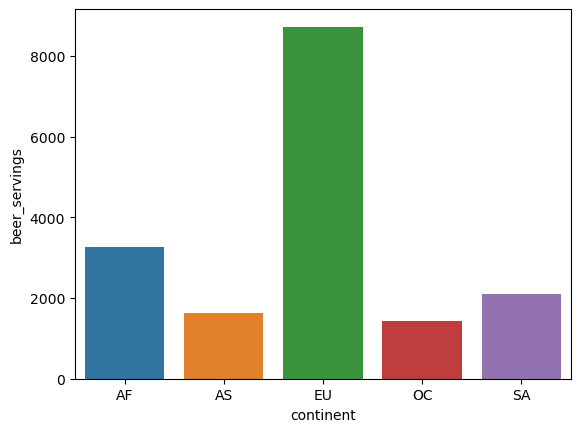

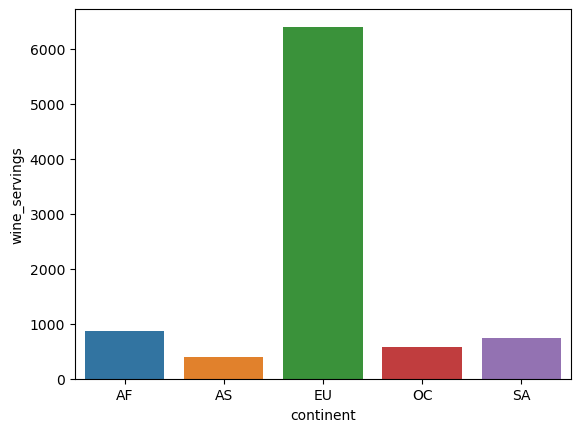

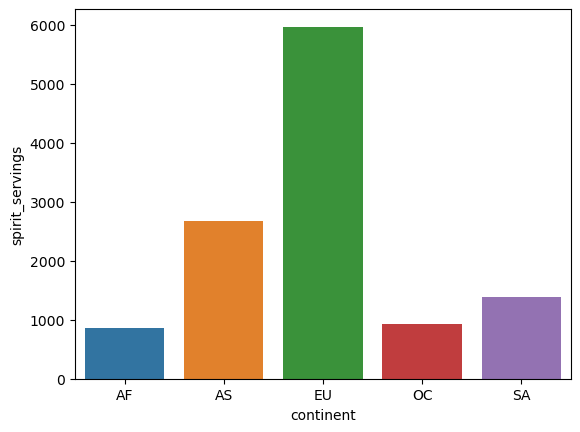

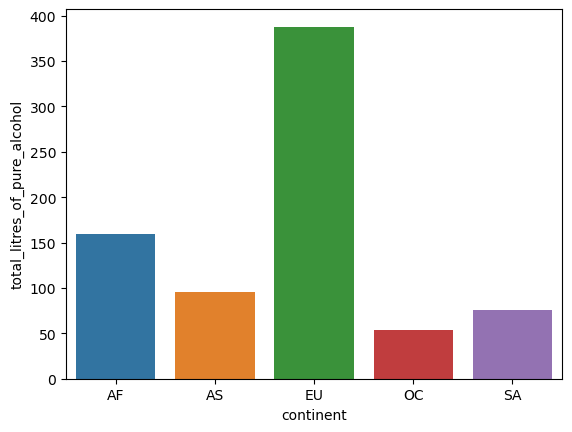

In [17]:
beerplot = sns.barplot(x=serving.index, y=serving['beer_servings'], data = serving)
plt.show()
wineplot = sns.barplot(x=serving.index, y=serving['wine_servings'], data = serving)
plt.show()
spiritplot = sns.barplot(x=serving.index, y=serving['spirit_servings'], data = serving)
plt.show()
alcohol_plot = sns.barplot(x=serving.index, y=serving['total_litres_of_pure_alcohol'], data = serving)
plt.show()

## Conclusion

From the above analysis we can conclude that there are total 193 countries and 5 countinents in the dataset under which:
1. there are total 79 countries whose beer servings is greater than equal to 100,
2. there are total 55 countries whose wine servings is greater than equal to 50 and total liters of alcohol is greater than equal to 3,
3. Europe is the continent that consumes maximum amount of beer, wine, spirit, and alcohol among all,
4. Beer is mostly consumed in Namibia which is in Southern Africa,
5. Wine is mostly consumed in France which is in Europe,
6. Spirit is mostly consumed in Grenada which is in Caribbean and
7. Alcohol is mostly consumed in Belarus which is in Europe.

Hence, Europe is the top most consumer of the drinks and has highest contribution in the worldwide drink market.